# Python, Data, 2025

---

- motivace,
- úvod do knihoven, instalace,
- typy grafů,
- tvorba jednoduchého grafu,
- detailní prvky grafu,
- kombinace Pand a matplotlib,
- kombinace Pand a seaborn.

---

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.Gr2a27W996qpjc9XHq_lNAHaHa%26pid%3DApi&f=1&ipt=75e655cef3d81414d74c3c49c1bed2c7a4eb506928ef5afc6c493766aaf0ccd8&ipo=images" width="250" style="margin-left:auto; margin-right:auto"/>

## Úvod do vizualizace

---



### Proč je vizualizace důležitá?

---

*Vizualizace* dat je jedním **z nejefektivnějších způsobů**, jak porozumět velkým množstvím informací.

Pomáhá:
- identifikovat vzory a trendy,
- odhalit anomálie,
- vysvětlit závěry širšímu (dokonce netechnickému) publiku.

Graf často odhalí to, co není vidět přímo v datech.

### Jak pracovat s existujícími daty?

---

In [ ]:
import seaborn as sns
import pandas as pd

<br>

Načti jeden z předchystaných datasetů přímo v knihovně:

In [ ]:
titanic_df = sns.load_dataset("titanic")

In [ ]:
titanic_df.head()

### Co chceme z dat zjistit?

---

Otázka: *„Záleželo přežití na pohlaví nebo cestovní třídě?“*

Tato otázka je konkrétní a měřitelná – pomocí dat zjistíme, zda a jak pohlaví nebo třída ovlivnily šanci na přežití.

#### Základní přehled hodnot ve sloupcích

---

In [ ]:
titanic_df["sex"].value_counts()

In [ ]:
titanic_df["class"].value_counts()

In [ ]:
titanic_df.info()

`values_counts` popsat množství jednotlivých hodnot ve sloupečcích.

In [ ]:
# titanic_df['age'].value_counts().tolist()  # NaN chybí

<br>

#### Odstraníme řádky s chybějící hodnotou v klíčových sloupcích

---

In [ ]:
bez_chybejici_dat_df = titanic_df.dropna(subset=["sex", "class", "survived"])

In [ ]:
bez_chybejici_dat_df.head()

Metoda `dropna` po zadání pole jmen sloupečků odstraní chybějící hodnoty.

<br>

### Jak nastavit jednoduchý graf?

---

Použiješ knihovnu `seaborn` pro vytvoření sloupcového grafu, který porovná přežití podle **pohlaví a třídy**.

In [ ]:
import matplotlib.pyplot as plt

<br>

#### Zobrazení dat na sloupcovém grafu

---

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bez_chybejici_dat_df, x="sex", hue="survived", palette="pastel")
plt.title("Přežití podle pohlaví")
plt.xlabel("Pohlaví")
plt.ylabel("Počet cestujících")
plt.legend(title="Přežil", labels=["Ne", "Ano"])
plt.tight_layout()

#### Doplnění grafického výstupu podle pohlaví a cestovních tříd:

In [ ]:
sns.catplot(data=bez_chybejici_dat_df, x="class", hue="survived", col="sex", kind="count", palette="muted")
plt.tight_layout()

### Souhrn

---

Z grafů je patrné, že ženy měly výrazně vyšší šanci na přežití než muži.

Také **první třída** měla vyšší šanci na přežití než nižší třídy – viz podrobnější rozdělení podle `class`.

### Jak nakonec data vyexportovat?

---

#### Vytvoření grafu

---

In [ ]:
graf = sns.catplot(data=bez_chybejici_dat_df,
                   x="class",
                   hue="survived",
                   col="sex",
                   kind="count",
                   palette="muted")

##### Přidání nadpisu pro výstup

---

In [ ]:
graf.fig.suptitle("Přežití podle třídy a pohlaví", y=1.05)

##### Uložení grafu do souboru

---

In [ ]:
graf.savefig("preziti_titanic.png")

<br>

## Úvod ke knihovnám

---

### Proč právě matplotlib a seaborn?

---
`matplotlib` je základní a nejpoužívanější knihovna pro tvorbu grafů v Pythonu.

Nabízí:
- Plnou kontrolu nad grafy (styl, barvy, osy, anotace),
- možnost exportu do různých formátů (PNG, SVG, PDF, atd.),
- kompatibilitu se všemi běžnými datovými nástroji v Pythonu.

<br>

`seaborn` je nadstavba nad `matplotlib`.

Zaměřuje se/zlepšuje:
- jednodušší syntaxi pro běžné úkoly,
- přednastavené vizuální styly (estetika!),
- **integraci s pandas dataframe.**

### Jak nainstalovat knihovny?

---

Instalaci proveď v rámci *virtuálního prostředí*:

In [ ]:
# !pip install matplotlib

In [ ]:
# !pip install seaborn

... následná kontrola verzí obou knihoven.

<br>

Ohlášení pro použití knihovny v rámci skriptu s následným aliasem pro snadnější používání:

In [ ]:
import matplotlib.pyplot as mpl
import matplotlib  # kontrola verze

In [ ]:
import seaborn as sns

In [ ]:
matplotlib.__version__

In [ ]:
sns.__version__

### Kde najdu další informace pro práci?

---

- 📘 [Oficiální web matplotlib](https://matplotlib.org/)
- 📘 [Oficiální web seaborn](https://seaborn.pydata.org)

🔝 **Tip**: `seaborn` má skvělý gallery, kde si můžeš vybrat graf podle vzhledu.

### Jaké existují další alternativy pro práci s grafy?

---

V dnešní době existuje několik moderních alternativ pro různé účely:

| Knihovna        | Popis                                                                 |
|-----------------|------------------------------------------------------------------------|
| **Plotly**      | Interaktivní grafy, vhodné pro webové aplikace (např. Dash).           |
| **Altair**      | Deklarativní zápis, integrace s Pandas a Vega-Lite.                   |
| **Bokeh**       | Interaktivní vizualizace s podporou velkých datasetů a webových výstupů. |
| **Plotnine**    | Python port oblíbeného R balíčku ggplot2.                             |
| **Holoviews**   | Vysokoúrovňová knihovna nad Bokeh a Matplotlib s jednoduchou syntaxí. |

🔝 **Doporučení**, `matplotlib` + `seaborn` je výborný základ.

Pokud cílíš na pokročilejší vizualizace, interaktivní grafy, vyzkoušej `Altair` nebo `Plotly`.

<br>

## Typy grafů

---

Pro různé hodnoty a průběhy se ti budou hodit jiné typy grafů.

### 📊 Jaký typ grafu použít?

---

| Co chci zjistit / ukázat                                      | Typ grafu                 | Popis / Knihovny                          | Příklad scénáře |
|----------------------------------------------------------------|---------------------------|-------------------------------------------|------------------|
| 📈 Vývoj hodnot v čase                                          | `line plot`               | Čárový graf (`plt.plot()`, `df.plot()`)   | Průběh teplot během týdne |
| 📊 Rozložení hodnot jedné proměnné                              | `histogram`               | Histogram (`plt.hist()`, `sns.histplot()`)| Kolik lidí má jaký věk ve třídě |
| 📦 Rozložení + extrémy hodnot mezi skupinami                    | `boxplot`                 | `sns.boxplot()`, `plt.boxplot()`          | Porovnání platů v různých odděleních |
| 🧮 Srovnání kategorií podle četnosti                            | `bar plot`, `countplot`   | Sloupcový graf (`plt.bar()`, `sns.countplot()`) | Počet studentů v různých seminářích |
| 🍕 Poměrné rozdělení v rámci celku                              | `pie chart`               | Koláčový graf (`plt.pie()`) – používat opatrně | Rozdělení rozpočtu domácnosti |
| 🔵 Vztah mezi dvěma číselnými proměnnými                        | `scatter plot`            | Bodový graf (`plt.scatter()`, `sns.scatterplot()`) | Závislost mezi věkem a výší útraty |
| 🔥 Závislost mezi vícero proměnnými                             | `pairplot`, `heatmap`     | `sns.pairplot()`, `sns.heatmap()`         | Jak spolu souvisí výška, váha a věk |
| 🟦 Srovnání kategorií + další proměnná                          | `grouped bar plot`        | `sns.catplot(kind="bar", hue=...)`        | Srovnání přežití podle pohlaví a třídy na Titanicu |
| 🌫️ Hustota rozložení                                           | `kdeplot`, `violinplot`   | `sns.kdeplot()`, `sns.violinplot()`       | Rozložení známek studentů s vyznačenou hustotou |
| 🧱 Hustota bodů ve 2D prostoru                                  | `hexbin`                  | `plt.hexbin()`                            | Kde se nejvíc koncentrují zákazníci podle věku a útraty |

<br>

V tabulce výše najdeš spíše katalogově nebo orientačně, které typy grafů využiješ v jakých situacích.

<br>

## Nejčastější typy grafů a jejich použití

---

Jde zejména o tyto typy:
1. *plot*,
2. *scatter*,
3. *bar*,
4. *pie*,
5. *histogram*.

### Typ plot

---

**Plot** je čárový graf.

Ukazuje vývoj hodnot v čase nebo závislost dvou proměnných, kde jedna z nich je obvykle postupná (např. dny, roky, kroky).

Nejčastěji popisuje nějakou změnu v čase.

Např. *teplota během týdne*, *počet kroků za den*, *cena akcií*.

#### Vstupní hodnoty

---

In [ ]:
dny = ["Po", "Út", "St", "Čt", "Pá", "So", "Ne"]

In [ ]:
kroky = [3500, 4200, 3900, 5000, 4800, 7000, 6500]

#### Grafický výstup

---

In [ ]:
# plt.plot?

In [ ]:
# Vykreslení
plt.plot(dny, kroky)

# Popisky
plt.title("Počet kroků za týden")
plt.xlabel("Den")
plt.ylabel("Počet kroků")

#### Co z grafu uvidíš?

---

- Na **ose X** budou dny v týdnu (Po až Ne),
- na **ose Y** bude počet kroků.

#### Shrnutí
---

Při relativně malém množství dat vidíš šikovný, grafický průběh.

<br>

### Typ scatter

---

**scatter** je bodový graf, který ukazuje vztah mezi **dvěma a více číselnými proměnnými**.

Pokud chceš zjistit, jestli spolu dvě věci nějak souvisí.

Např. *„Když víc spím, mám víc energie?“* nebo *„Když víc cvičím, vážím míň?*

#### Vstupní hodnoty

---

In [ ]:
delka_spanku_pres_tyden = [6, 7, 5, 8, 6.5, 7.5, 4]
pocit_energie = [4, 6, 3, 8, 5, 7, 2]

#### Grafický výstup

---

In [ ]:
# Vykreslení
plt.scatter(delka_spanku_pres_tyden, pocit_energie)

# Popisky
plt.title("Spánek vs. Energie")
plt.xlabel("Hodiny spánku")
plt.ylabel("Pocit energie (0–10)")

#### Co z grafu uvidíš?
---

- **Osa X** = kolik hodin spíš,
- **osa Y** = kolik energie jsi máš.

Když body stoupají zprava nahoru, znamená to: **víc spánku → víc energie**.

#### 🧠 Shrnutí

---

Scatter používáš, pokud máš dvě číselné hodnoty a chceš vidět souvislost.

Nezobrazuje čas, ale vztah mezi proměnnými.

Výborný pro hledání vzorců, trendů nebo odlehlých bodů.

<br>

### Typ bar

---

**bar** je sloupcový graf, který ukazuje porovnání mezi kategoriemi.

Když chceš porovnat kolik lidí/co se vyskytuje v jednotlivých skupinách, resp. kategorizaci čehokoliv.

Např. *Kolik lidí má rádo jaký předmět?*

#### Vstupní hodnoty

---

In [ ]:
predmety = ["Matematika", "Čeština", "Dějepis", "Informatika"]
oblibenost = [8, 5, 3, 10]

#### Grafický výstup

---

In [ ]:
plt.bar(predmety, oblibenost)

plt.title("Oblíbenost předmětů ve třídě")
plt.xlabel("Předmět")
plt.ylabel("Počet studentů")

Každý sloupec ukazuje, kolik studentů má daný předmět rádo. Lehce porovnáš, který je nejoblíbenější.

<br>

### Typ histogram

---

**histogram** ukazuje rozložení hodnot, tedy kolik hodnot spadá **do jednotlivých rozsahů** (intervalů).

Tedy, když chceš vědět, kolik lidí je ve věku 10–15, 15–20, 20–25...

Hodí se pro větší počet čísel a jejich frekvenci.

#### Vstupní hodnoty

---

In [ ]:
veky = [14, 15, 16, 17, 17, 18, 19, 20, 20, 22, 23, 24, 24, 25]

#### Grafický výstup

---

In [ ]:
plt.hist([14, 15, 16, 17, 17, 18, 19, 20, 20, 22, 23, 24, 24, 25], bins=5)

plt.title("Rozložení věku")
plt.xlabel("Věk")
plt.ylabel("Počet osob")

Histogram rozdělí věky do skupin (např. 14–16, 16–18…) a ukáže, kolik lidí spadá do každé skupiny.

<br>

### Typ pie

---

**pie** je koláčový graf, který ukazuje jaký podíl tvoří jednotlivé části z celku.

Když chceš ukázat poměry nebo procenta.

Např. *Kolik procent tvoří jednotlivé druhy ovoce ve svačině?*

#### Vstupní hodnoty

---

In [ ]:
ovoce_ke_svacine = ["Jablka", "Banány", "Hrušky", "Mandarinky"]
mnozstvi = [4, 2, 1, 3]

#### Grafický výstup

---

In [ ]:
plt.pie(mnozstvi, labels=ovoce_ke_svacine, autopct="%1.1f%%")

plt.title("Podíl ovoce ve svačině")

Barevný koláč s jednotlivými dílky, které ukazují, jak velkou část tvoří každé ovoce. Např. že jablka tvoří největší podíl.

<br>

#### **🧠 CVIČENÍ 🧠, procvič si TYPY grafů**

---

**Úkol 1:** *Jak lidé tráví volný čas?*
    
Ve škole bylo dotázano 20 studentů, jaký typ volnočasové aktivity mají nejraději.

Odpovědi byly:
- Sport: 6
- Hraní her: 5
- Čtení: 3
- Hudba: 4
- Výtvarné aktivity: 2

➡️ **Zobraz výsledky pomocí vhodného grafu.**

#### Vstupní data

---

In [ ]:
aktivity = ["Sport", "Hraní her", "Čtení", "Hudba", "Výtvarné aktivity"]
pocty = [6, 5, 3, 4, 2]

#### Zobrazení grafu

---

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(aktivity, pocty)
plt.xlabel('Aktivity')
plt.ylabel('Počty')

<details>
    <summary>▶️ Řešení</summary>
    
```python
aktivity = ["Sport", "Hraní her", "Čtení", "Hudba", "Výtvarné aktivity"]
pocty = [6, 5, 3, 4, 2]

# Graf
plt.bar(aktivity, pocty, color="skyblue")

# Popisky
plt.title("Oblíbené volnočasové aktivity studentů")
plt.xlabel("Aktivita")
plt.ylabel("Počet studentů")

# Zobrazení
plt.show()
```
</details>

**Úkol 2:** *Kolik hodin spánku studenti mají?*

Ze stejného průzkumu máme i údaje, kolik hodin studenti obvykle spí za den.

➡️ **Zobraz rozložení počtu hodin spánku pomocí vhodného grafu.**

#### Vstupní data

---

In [ ]:
delka_spanku = [6.5, 7, 8, 5, 6, 7.5, 6.5, 5.5, 8, 7, 6, 6.5, 7, 5, 6, 7.5, 8.5, 6, 6.5, 7]

#### Zobrazení grafu

---

In [ ]:
# plt.hist?

In [ ]:
plt.hist(delka_spanku, bins=2)

<details>
    <summary>▶️ Řešení</summary>
    
```python
# Data
delka_spanku = [6.5, 7, 8, 5, 6, 7.5, 6.5, 5.5, 8, 7, 6, 6.5, 7, 5, 6, 7.5, 8.5, 6, 6.5, 7]

# Graf
plt.hist(delka_spanku, bins=5, color="lightgreen", edgecolor="black")

# Popisky
plt.title("Rozložení hodin spánku studentů")
plt.xlabel("Hodiny spánku")
plt.ylabel("Počet studentů")

# Zobrazení
plt.show()
```
</details>

<br>

#### **🧠 CVIČENÍ PRO POKROČILÉ 🧠, procvič si TYPY grafů**

---

Cílem této úlohy je vytvořit takový graf, který zobrazuje zastoupení různých kategorií produktů podle jejich prodeje ve fiktivním obchodě.

1. Vytvoř **graf zobrazující procentuální zastoupení** různých kategorií produktů podle jejich prodeje.
2. nastav vlastní barvy pro jednotlivé kategorie grafu.
3. přidej **popisky os** a **legendu**, která zobrazuje **názvy kategorií** produktů a jejich procentuální zastoupení v prodeji.
4. ulož výsledný graf do souboru **ve formátu PNG**.

In [ ]:
data = {"Elektronika": 150000,
        "Oblečení": 95000,
        "Domácí potřeby": 120000,
        "Kosmetika": 85000,
        "Hračky": 55000}

In [ ]:
barvy = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#### Popisky a další konstanty

---

#### Vytvoření grafu

---

<details>
    <summary>▶️ Řešení</summary>
    
```python
# Rozdělení dat
labels = list(data.keys())
sizes = list(data.values())

# Vlastní barvy
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Vytvoření koláčového grafu
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90)

# Nastavení názvů os a legendy
ax.set_title('Prodejní zastoupení kategorií produktů')
ax.legend(title='Kategorie', loc='upper right', bbox_to_anchor=(1, 0.5))

# Uložení grafu do souboru PNG
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()

# Alternativa>>>
plt.pie(data.values(), 
        labels = data.keys(), 
        colors = barvy, 
        autopct='%1.0f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': props_color},
        textprops={'color': props_color, 'size': 'x-large'})

# Přidání popisků grafu a legendy
plt.title(plot_title, fontsize=25)
plt.legend(loc='lower right',
           fontsize = 12,
           bbox_to_anchor=(1.35, 0.6))


# Úprava velikosti grafu
plt.gcf().set_size_inches(10, 7)

# Zobrazení grafu
plt.show( )
```
</details>

## Vytvoření jednoduchého grafu

---

Celý postup pro práci s daty a grafickým výstupem má přibližně takový průběh:
1. **Nahrávání knihoven, načítání dat**,
2. **Volání vykreslovací metody**, `plt.plot(x, y)`, ...
3. **Stylování a formátování**,
    - barvy (color),
    - typ čáry (linestyle),
    - tloušťka (linewidth),
    - značky (marker),
5. **Popisky a nadpisy**, plt.title(), plt.xlabel(), plt.ylabel()
6. **Mřížka a legenda**, plt.grid(True), plt.legend()
7. **Uložení grafu**, plt.savefig("nazev.png")

### Nahrávání & načítání

---

In [ ]:
import matplotlib.pyplot

In [ ]:
import matplotlib.pyplot as plt

Standard je práce **s aliasem**.

Načtení dat potom zpřístupní knihovna `pandas`:

In [ ]:
import pandas as pd

#### Načteme Excel soubor

---

In [ ]:
file_path = "../onsite/RESULT_LIST_ANONYM_CAPACITY_MARKET_FCR_2025-05-20_2025-05-20.xlsx"

In [ ]:
excel_df = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
excel_df.head()

Pokud budeš potřebovat zpracovat v rámci souboru několik sešitů:

In [ ]:
excel_file = pd.ExcelFile(file_path)

#### Zobrazíme názvy listů v Excelu

---

In [ ]:
sheet_names = excel_file.sheet_names

In [ ]:
sheet_names

In [ ]:
df = excel_file.parse(sheet_name="001")

#### Zobrazíme první řádky

---

In [ ]:
df.head()

<br>

### Vykreslovací metody, co budeme popisovat?

---

**Zajímá tě**: *Kolik kapacity bylo alokováno v každé zemi?*

Použijeme k tomu sloupcový graf (`bar chart` ~  sloupcový graf), kde:
- **osa X** = zkratka země (např. DE, CZ),
- **osa Y** = celkové množství alokované kapacity v MW.

Před samotným zobrazováním ale potřebuješ data trochu "učesat", seskupit:

#### Spočítáme celkovou kapacitu pro každou zemi

---

In [ ]:
df_grouped = df.groupby("COUNTRY")["ALLOCATED_CAPACITY_[MW]"].sum()

In [ ]:
df_grouped.head()

<br>

#### Seřadíme od nejvyšší po nejnižší

---

In [ ]:
col_grouped = df_grouped.sort_values(ascending=False)

In [ ]:
col_grouped

In [ ]:
type(col_grouped)

#### Vytvoření sloupcového grafu

---

In [ ]:
countries = col_grouped.index.tolist()    # to_list()
capacities = col_grouped.values.tolist()  # to_list()

In [ ]:
capacities

In [ ]:
# Vykreslení grafu
obr = plt.figure(figsize=(8, 5))
plt.bar(countries, capacities, edgecolor="black")

plt.title("Alokovaná kapacita podle země (MW)")
plt.xlabel("Země")
plt.ylabel("Alokovaná kapacita [MW]")

plt.grid(axis="y", linestyle="--", alpha=0.9)
plt.savefig(fname="alokovana_kapacita_podle_zemi",
            format="jpg")  # Formát pro export je PNG

In [ ]:
# plt.savefig?

<br>

Další podporované suffixy, které ti knihovna defaultně poskytne pro další práci:

In [ ]:
obr.canvas.get_supported_filetypes()

<br>

Uložený graf najdeš jako výstup v aktuálním adresáři.

Pokud neuvedeš explicitně formát, vytvoří interpret **automaticky nespecifikovaný** (`_format`).

<br>

#### Detaily objektů

---

- `figure`, vytváří nový „prázdný“ obrázek, do kterého se kreslí grafy. Bez něj by se graf vykreslil do výchozí (defaultní) plochy.
| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `figsize` | Velikost obrázku v palcích (šířka, výška) | `figsize=(8, 5)` |
| `dpi` | Kvalita (rozlišení) při exportu obrázku |	`dpi=100` |

- `bar`, vytváří sloupcový (bar) graf – každý sloupec odpovídá jedné hodnotě z osy X a jeho výška odpovídá hodnotě Y.

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `x` | Kategorie nebo štítky na ose X | `x=["A", "B", "C"]` |
| `height` | Hodnoty na ose Y | `height=[5, 2, 7]` |
| `color` | Výplňová barva sloupce	| `"blue"`, `"#06b085"` |
| `edgecolor` |	Barva okraje sloupce | `"black"` |
| `width` |	Šířka sloupců |	`0.6` |
| `label` |	Popisek pro legendu| `"DE"` |

- `grid`, zobrazí mřížku pro lepší čitelnost hodnot.

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `axis` |	"x", "y" nebo "both" |	`axis="y"` |
| `linestyle` |	Styl čáry ("--", ":", "-.")| 	`"--"` |
| `alpha` | Průhlednost čáry (0–1) | `0.5` |

- `savefig`,

| Parametr | Popis | Příklad |
| :-: | :- | :- |
| `fname` |	Název a přípona souboru	| `"graf1.png"` |
| `format` |	přípona souboru	| `"png"` |
| `dpi` |	Rozlišení |	`dpi=300` |
| `transparent` | Uložení s průhledným pozadím (bool) |	`transparent=True` |
| `bbox_inches` | Oříznutí okrajů ('tight' doporučeno) | `bbox_inches='tight'` |

- `show`, zobrazí vytvořený graf. Jupyter notebook to umí i bez něj, ale je do nutnost ve skriptu/modulu.

<br>

### Upravená ukázka pro `seaborn`

---

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_excel("../onsite/RESULT_LIST_ANONYM_CAPACITY_MARKET_FCR_2025-05-20_2025-05-20.xlsx", sheet_name="001")

In [ ]:
df_grouped = df.groupby("COUNTRY")["ALLOCATED_CAPACITY_[MW]"].sum().reset_index()

In [ ]:
df_grouped = df_grouped.sort_values("ALLOCATED_CAPACITY_[MW]", ascending=False)

In [ ]:
df_grouped.head()

In [ ]:
sns.set_theme(style="whitegrid")  # Defaultní styl os, bez úprav

plt.figure(figsize=(8, 5))
sns.barplot(data=df_grouped,
            x="COUNTRY",
            y="ALLOCATED_CAPACITY_[MW]",
            color="skyblue",
            edgecolor="black")

plt.title("Alokovaná kapacita podle země (MW)")
plt.xlabel("Země")
plt.ylabel("Alokovaná kapacita [MW]")

### Srovnání knihoven `matplotlib` vs. `seaborn`

---


| Kritérium               | `matplotlib`                                     | `seaborn`                                      |
|-------------------------|--------------------------------------------------|------------------------------------------------|
| **Zápis**               | Ručně specifikujeme `x` a `y`                    | Pracujeme přímo s `DataFrame`                 |
| **Styl a vzhled**       | Základní, vyžaduje víc ladění                    | Moderní vzhled už ve výchozím nastavení       |
| **Rozšíření (`hue`, ...)** | Nutno řešit ručně                              | Snadné díky parametrům jako `hue`, `col`, ... |
| **Flexibilita**         | Velmi vysoká, ale více kódu                     | Efektivní a úsporná syntaxe pro běžné případy |
| **Vhodné pro**          | Detailní kontrolu, pokročilé grafy              | Rychlou, elegantní vizualizaci                |
| **Výchozí styl**        | Spíše technický                                 | Elegantní a čitelný                           |


<br>

#### **🧠 CVIČENÍ 🧠, procvič si první úlohu s vlastním grafem**

---

Vyhotov jednotlivé kroky:
1. Vytvoř vlastní DataFrame s uvedenými daty `vek` a `cas`.
2. rozděl vygenerované hodnoty do kategorií `bins` a `labels`,
3. rozdělené kategorie zapiš do sloupečku `Věková skupina`,
4. seskup data podle `Věková skupina` a získej průměrnou hodnotu času u obr. pro každou skupinu,
5. zaokrouhli desetinné číslo na jednu desetinu,
6. Vykresli sloupcový graf pomocí `matplotlib`.
7. Vykresli tentýž graf pomocí `seaborn`.
8. Styluj oba grafy tak, aby byly přehledné a prezentovatelné.
9. Napiš krátké srovnání rozdílu v zápisu a vzhledu.

#### Věkové skupiny a průměrný čas u obrazovky (v hodinách za den)

---

In [ ]:
import numpy as np

In [ ]:
n = 10_000_000
bins = [9, 14, 19, 24, 29, 34, 39, 44]
labels = ["10–14", "15–19", "20–24", "25–29", "30–34", "35–39", "40–44"]

#### Věkový rozsah: od 10 do 44 let (věk jako celé číslo)

---

In [ ]:
vek = np.random.randint(10, 45, size=n)

#### Čas u obrazovky v hodinách: náhodně podle věku (čím mladší, tím spíš víc)
---
Např. základ: 2–7 h, s lehkou variabilitou

In [ ]:
cas = np.clip(np.random.normal(loc=7 - 0.1 * vek, scale=0.8, size=n), 
              a_min=0, a_max=None)

#### Zaokrouhlíme na 1 desetinné místo

---

In [ ]:
cas = np.round(cas, 1)

In [ ]:
df_data = pd.DataFrame({"Věk": vek, "Čas": cas})

In [ ]:
df_data.head()

In [ ]:
df_data['Věková skupina'] = pd.cut(df_data['Věk'], bins=bins, labels=labels)

In [ ]:
df_seskupene = df_data.groupby('Věková skupina')['Čas'].mean().reset_index()

In [ ]:
df_seskupene['Čas'] = df_data['Čas'].round(1)

In [ ]:
df_seskupene.head()  # sort_values()

#### `matplotlib`

---

In [ ]:
plt.figure(figsize=(8,5))

plt.bar(df_seskupene['Věková skupina'],
        df_seskupene['Čas'],
        edgecolor='black')

plt.title('Průměrná doba u obrazovky dle věk')
plt.xlabel('Věková skupina')
plt.ylabel('Čas')

#### `seaborn`

---

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 5))

obr = sns.barplot(data=df_seskupene,
                  x='Věková skupina',
                  y='Čas',
                  color='lightblue',
                  edgecolor='black')
obr.plot(2, 2.8, '*', markersize=11, color='red')  # Doplnění značky pro výstup

plt.title('Průměrná doba u obrazovky dle věk')

<details>
    <summary>▶️ Řešení</summary>
    
```python
df_data = pd.DataFrame({"Věk": vek, "Čas u obrazovky (h/den)": cas})
df_data["Věková skupina"] = pd.cut(df_data["Věk"], bins=bins, labels=labels)
df_grouped = df_data.groupby("Věková skupina")["Čas u obrazovky (h/den)"].mean().reset_index()
df_grouped["Čas u obrazovky (h/den)"] = df_grouped["Čas u obrazovky (h/den)"].round(1)

# matplotlib
plt.figure(figsize=(8, 5))
plt.bar(df_grouped["Věková skupina"], df_grouped["Čas u obrazovky (h/den)"], color="cornflowerblue", edgecolor="black")

plt.title("Průměrná doba u obrazovky podle věku (simulovaná data)")
plt.xlabel("Věková skupina")
plt.ylabel("Průměrný čas (h/den)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

# seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(data=df_grouped,
            x="Věková skupina",
            y="Čas u obrazovky (h/den)",
            color="lightblue",
            edgecolor="black")

plt.title("Průměrná doba u obrazovky podle věku (simulovaná data)")
plt.xlabel("Věková skupina")
plt.ylabel("Průměrný čas (h/den)")

plt.show()
```
</details>

<br>

## Prvky grafu

---


U nového grafu je obvykle potřeba **zajistit dva prvky**:
* `axes` - tedy osy, chystaného grafu. Hodnoty, které hodláš zobrazit,
* `figure` - objekty grafů (legenda, nadpis, detaily čáry grafu).

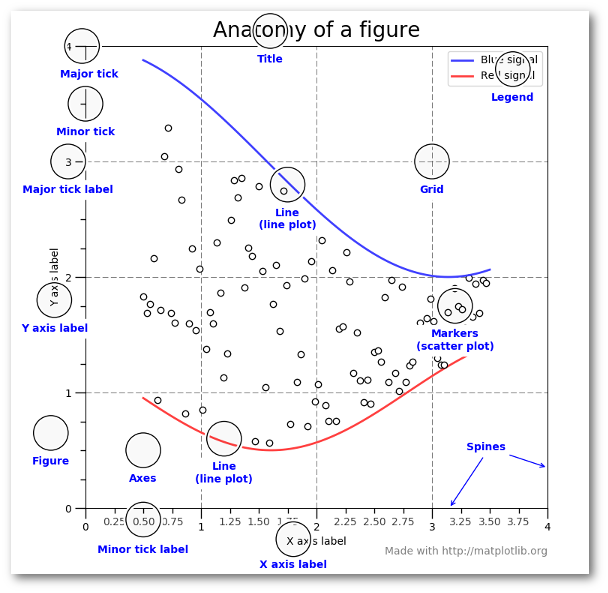

<br>

Objekt `figure` je místo, které obsahuje všechny objekty reprezentující **grafiku, text a obrázky** okolo,

Zatímco `axes` reprezentuje grafické prostředí.

Tedy rámeček se značkami a popisky, který bude případně obsahovat prvky z funkce `plot`, které tvoří vizualizaci. 

In [ ]:
plt.figure()
plt.axes()

In [ ]:
obr = plt.figure()
osy = plt.axes()

<br>

Pokud ti stačí opravdu jednoduchý graf, můžeš pracovat (jako v ukázce), pomocí samotné funkce `plot`.

Ta si sama, na pozadí vytvoří defaultní hodnoty pro `axes` a `figures`.

In [ ]:
plt.plot()

<br>

Pomocné vstupní hodnoty pro vyzobrazení průběhu s `matplotlib`:

In [ ]:
x = [0, 1, 2, 3, 4]
y = [-1, 1, -2, 2, -3]

In [ ]:
plt.plot(x, y)

Analogický postup za použití DataFrame objektu a knihovny `seaborn`:

In [ ]:
df_data = pd.DataFrame({'Osa x': [0, 1, 2, 3, 4], 'Osa y': [-1, 1, -2, 2, -3]})

In [ ]:
df_data.head()

Všimni si, že pro `seaborn` je typické, vycházet z hodnot, z tabulky.

<br>

In [ ]:
sns.lineplot(data=df_data, x='Osa x', y='Osa y', marker='o')

Ale opatrně na nekonzistenci jmen os!

In [ ]:
df_data.head()

In [ ]:
# sns.lineplot(data=df_data, x='x', y='y', marker='o')  # 'ValueError'

<br>

#### **🧠 CVIČENÍ 🧠, transformace DataFrame a vykreslení čárového grafu**

---

Máte následující tabulku, která obsahuje informace o měsíčních výdajích na různé kategorie:

* Měsíce (months): Leden, Únor, Březen, Duben, Květen.
* Výdaje na potraviny (food): 1200, 1500, 1300, 1400, 1350.
* Výdaje na dopravu (transport): 300, 350, 400, 320, 310.


Vaším úkolem je:
* Převést sloupec měsíce (months) na index tabulky.
* Přidat nový sloupec total_expenses, který bude součtem výdajů na potraviny a dopravu.
* Vykreslit čárový graf, který bude zobrazovat celkové výdaje (total_expenses) v jednotlivých měsících.

| month | food | transport | total_expenses |
| :-: | :-: | :-: | :-: | 
| Leden |     1200   |     300    |        1500 |
| Únor   |    1500   |     350    |        1850 |
| Březen  |   1300   |     400    |        1700 |
| Duben    |  1400   |     320    |        1720 |
| Květen   |  1350   |     310    |        1660 |

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_df = pd.DataFrame({
    'months': ['Leden', 'Únor', 'Březen', 'Duben', 'Květen'],
    'food': [1200, 1500, 1300, 1400, 1350],
    'transport': [300, 350, 400, 320, 310]
})

<details>
    <summary>▶️ Řešení</summary>
    
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'months': ['Leden', 'Únor', 'Březen', 'Duben', 'Květen'],
    'food': [1200, 1500, 1300, 1400, 1350],
    'transport': [300, 350, 400, 320, 310]
})

data.set_index('months', inplace=True)

data['total_expenses'] = data['food'] + data['transport']

sns.lineplot(data=data, x=data.index, y='total_expenses', marker='o')

plt.title('Celkové výdaje v jednotlivých měsících')
plt.xlabel('Měsíce')
plt.ylabel('Celkové výdaje (Kč)')

plt.show()
```
</details>

Všechny grafy lze **značně** *customizovat*.

Mezi nejčastější úpravy patří zejména:
* styl čáry & barva čáry,
* body čáry,
* mřížku,
* osy,
* popisky,
* legendu.

<br>

Pro všechny úpravy grafů, které se ti mohou hodit, omkrni funkci `plot`:

In [ ]:
# help(plt.plot)

<br>

### Styl čáry

---

Pomocí argumentu `linestyle` definuješ **styl čáry** (nebo také formát čáry):

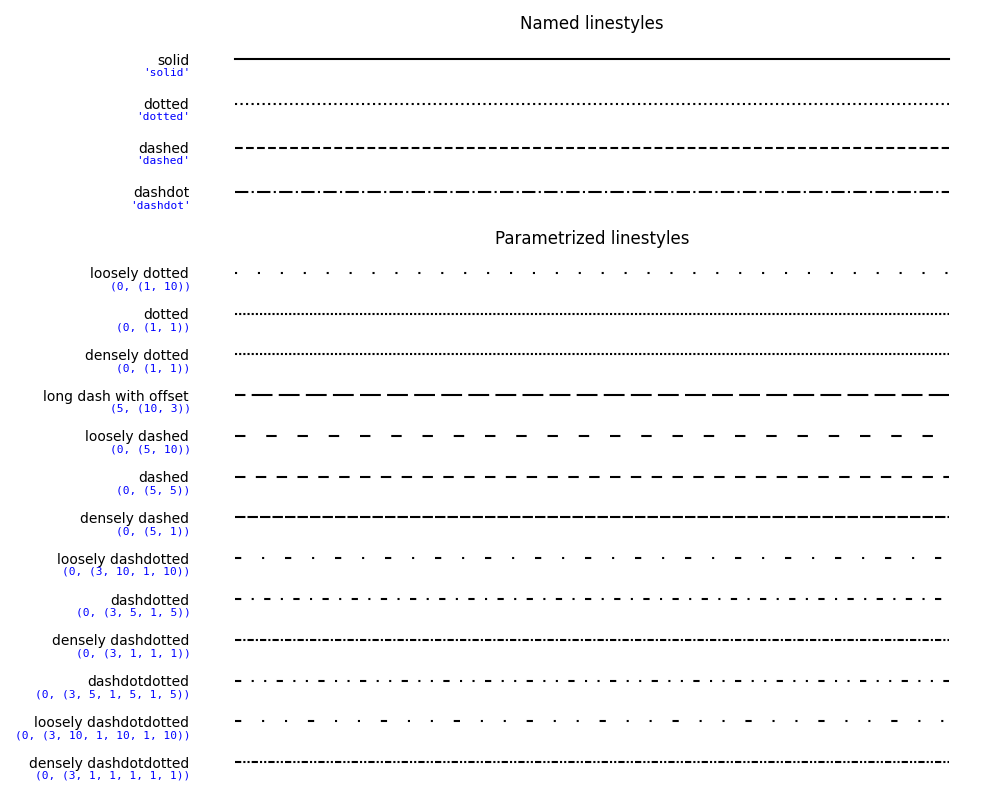

In [ ]:
import numpy

In [ ]:
plt.plot(x, numpy.array(y) + 1, linestyle='solid')
plt.plot(x, numpy.array(y) + 2, linestyle='dashed')
plt.plot(x, numpy.array(y) + 3, linestyle='dashdot')
plt.plot(x, numpy.array(y) + 4, linestyle='dotted')

<br>

Můžeš také použít ekvivalentní označení pomocí **znaků**:

In [ ]:
plt.plot(x, numpy.array(y) + 4, linestyle='-')   # solid
plt.plot(x, numpy.array(y) + 5, linestyle='--')  # dashed
plt.plot(x, numpy.array(y) + 6, linestyle='-.')  # dashdot
plt.plot(x, numpy.array(y) + 7, linestyle=':');  # dotted

<br>

### Barva čáry

---

Pokud chceš upravit barvu, můžeš použít klíčové slovo `color`.

To přijímá argument řetězce představující prakticky jakoukoli představitelnou barvu.

In [ ]:
import matplotlib as mpl

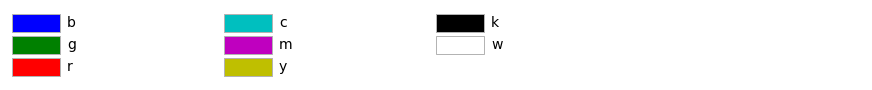

<br>

Pokud barvu neuvedeš, knihovna vybere automaticky ze základní palety barev.

In [ ]:
# mpl.colors.CSS4_COLORS  # 148 barev
# mpl.colors.XKCD_COLORS  # 949 barev
mpl.colors.BASE_COLORS    # 8 barev

<br>

Dále můžeš kombinovat různé formáty pro specifikaci barev u čas:

In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue')          # barva podle jmena
plt.plot(x, numpy.array(y) - 1, color='g')             # krátky barevný kód (rgbcmyk)
plt.plot(x, numpy.array(y) - 2, color='0.75')          # Stupně šedi od 0 do 1
plt.plot(x, numpy.array(y) - 3, color='#2a9d8f')       # Hexa kód (RRGGBB od 00 do FF)
plt.plot(x, numpy.array(y) - 4, color=(1.0, 0.2, 0.3)) # RGB tuple, hodnoty od 0 do 1
plt.plot(x, numpy.array(y) - 5, color='chartreuse');   # Všechny HTML názvy barev, které jsou podporované

<br>

Pokud chceš být extrémně stručný, můžeš jak styly čáry, tak barevné kódy zkombinovat **do jediného argumentu**:

In [ ]:
plt.plot(x, numpy.array(y) - 0, '-g')    # solid green, linestyle, color
plt.plot(x, numpy.array(y) - 1, '--c')   # dashed cyan
plt.plot(x, numpy.array(y) - 2, '-.k')   # dashdot black
plt.plot(x, numpy.array(y) - 3, ':r');   # dotted red

<br>

Takový zápis může být elegantním zkrácením zápisu, ale nemusí být každému ihned patrný.

Samotné písmeno potom odkazuje na standardní zkratky RGB (red/green/blue) a CMYK(Cyan/Magenta/Yellow/blacK).

<br>

### Značky

---

Dalším volitelným parametrem, pro tvorbu grafů, jsou značky bodů.

Pomocí parametru `marker` můžeš definovat značku bodu podle několika zadání:

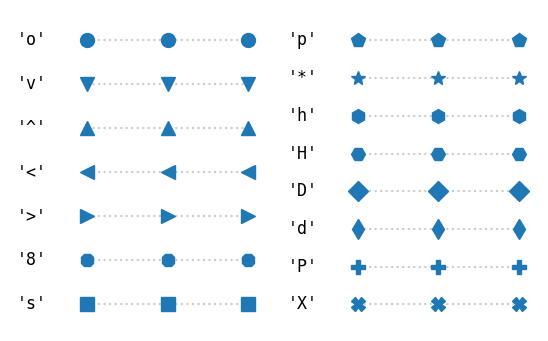

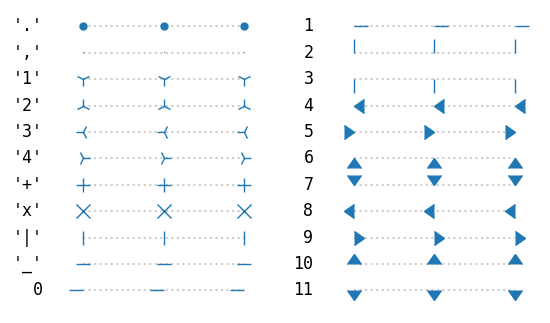


In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='x')

<br>

### Mřížka grafu

---

Pokud potřebuješ, můžeš do grafu přidat mřížku:

In [ ]:
plt.grid(True)

<br>

Pomocí funkce `grid` můžeš nastavit také další atributy.

Jako je styl čár mřížky, barva, hlavní mřížka, vedlejší mřížka, aj.

In [ ]:
# plt.grid?

In [ ]:
plt.grid(True, which='minor')

In [ ]:
plt.grid(True, color='r', linestyle='--', linewidth=1)

<br>

Rozšíření stylu mřížky na hlavní a vedlejší při doplnění logaritmického měřítka:

In [ ]:
plt.yscale('log')
plt.grid(True, color='r', which='major', linestyle='-')
plt.grid(True, color='k', which='minor', linestyle='--')

<br>

### Nastavení osy

---

Prvním krokem, který můžeš chtít upravit jsou rozsahy **os x** a **y**.

Pomocí funkcí:
* `xlim`, nastavuješ rozsah osy X,
* `ylim`, nastavuješ rozsah osy Y.

In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

In [ ]:
plt.xlim(-2, 7)
plt.ylim(-4, 6)
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

<br>

Osy je ale možné nastavit také pomocí funkce `axis` (neplést s `axes`).

Funkci potom předáš argumenty v podobě listu, podle vzoru: `[xmin, xmax, ymin, ymax]`.

In [ ]:
type(plt.axis)

In [ ]:
plt.axis([-2, 7, -5, 5])  # plt.xlim, plt.ylim
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

<br>

Pokud se ti nehodí, uvádět hranice explicitně, můžeš použít keyword, pro rovnoměrné rozložení `equal`:

In [ ]:
plt.axis('equal')  # vyzkoušej rozdíl mezi 'tight'
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 

In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D') 
plt.axis('tight')

<br>

### Popisky grafu

---

Dalšími volitelnými prvky jsou **lepší popisky**:
1. `title`, název grafu,
2. `xlabel`, popis osy X,
3. `ylabel`, popis osy Y,
4. `annotate`, anotace,
5. `legend`, legenda grafu,
6. `text`, vepsaný text.

In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D', label='průběh')

In [ ]:
plt.plot(x, numpy.array(y) - 0, color='blue', marker='D', label='průběh') #  label='průběh'

plt.title('Název grafu')
plt.xlabel('Popisek osy X')
plt.ylabel('Popisek osy Y')

plt.legend()

plt.text(1.5, -3, 'Default', fontsize=15, color="blue", style="italic")

plt.annotate("maximální hodnota grafu",
             xy=(3, 2),                         # konkrétní bod
             xytext=(1, 1.6),                   # levý dolní roh textu
             arrowprops=dict(arrowstyle="->"))  # typ ukazovatele

### Úskalí s označováním

---

Přesto, že některé parametry funkce `plt` přímo přehazuje na `ax` metody:
* `plt.plot()` --> `ax.plot()`,
* `plt.legend()` --> `ax.legend()`,

**neplatí pro všechny příkazy**.

Například pro rozsahy a popisky os:
* `plt.xlabel()` --> `ax.set_xlabel()`,
* `plt.xlim()` --> `ax.set_xlim()`,

Často se můžeš setkat s metodou `set`, která slouží k všeobecném nastavování místo jednotlivých výrazů:

In [ ]:
ax = plt.axes()
ax.plot(x, numpy.array(y) - 0)
ax.set(
    xlim=(-3, 7),
    ylim=(-5, 5),
    xlabel="osa X",
    ylabel="osa Y",
    title="Název grafu"
)

<br>

### Soubor několika grafů

---

Dalším doplňujícím prvkem je možnost nachystat několik sad grafů.

K takovému učelu slouží funkce `subplots`.

Jejím účelem je vystavit formát, jak bude sada grafů zobrazená a vykreslená.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fig, axs = plt.subplots(
    2,              # počet řádků
    2               # počet sloupečků
)

`fig` reprezentuje celý obrázek, tedy celé „plátno“, na které můžeš vykreslovat vícero grafů.

<br>

Umožňuje ti nastavit například:
- **celkovou velikost** (`figsize`),
- **nadpis celé plochy** (`fig.suptitle("Nadpis")`)
- nebo **uložit obrázek** (`fig.savefig("graf.png")`)

<br>

`axs` je array (pole) objektů `Axes`, tedy jednotlivých grafů.

Pokud zadáš třeba 2, 2, dostaneš `axs` jako matici 2×2, kde každý prvek odpovídá jednomu podgrafu.
- `axs[0, 0]` → levý horní graf
- `axs[1, 1]` → pravý dolní graf

In [ ]:
x = np.linspace(0, 10, 100)

In [ ]:
x

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# 1. Přímka
axs[0, 0].plot(x, x)
axs[0, 0].set_title("y = x")

# 2. Kvadratická funkce
axs[0, 1].plot(x, x**2)
axs[0, 1].set_title("y = x²")
axs[0, 1].set_xlabel('Časová řada')

# 3. Kubická funkce
axs[1, 0].plot(x, x**3)
axs[1, 0].set_title("y = x³")

# # 4. Odmocnina
axs[1, 1].plot(x, np.sqrt(x))
axs[1, 1].set_title("y = √x")

# Upraví rozložení grafů
plt.tight_layout()
plt.show()

<br>

#### **🧠 CVIČENÍ 🧠, procvič si vizualizaci v MATPLOTLIB**

---

Máš zadané dvě kategorie výrobků a jejich časovou řadu:

1. Vytvoř roční časovou řadu pro obě kategorie výrobků (A a B) na jednom grafu,
2. Přidej **popisky os**: `'Měsíce'` pro **osu x** a `'Prodej (v tisících kusů)'` pro **osu y**,
3. Přidej **legendu pro obě kategorie** výrobků (A a B),
4. Najděte **maximální** a **minimální** hodnoty pro obě kategorie výrobků a anotuj je v grafu.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rada_a = [23, 35, 40, 50, 60, 70, 80, 75, 65, 55, 45, 30]
rada_b = [15, 25, 35, 45, 55, 60, 58, 52, 45, 35, 25, 18]

<details>
    <summary>▶️ Řešení</summary>
    
```python
mesice = np.arange(1, 13)
kategorie_A = np.array(rada_a)
kategorie_B = np.array(rada_b)

# Vytvoření časové řady
plt.plot(mesice, kategorie_A, label='Kategorie A')
plt.plot(mesice, kategorie_B, label='Kategorie B')

# Popisky os
plt.xlabel('Měsíce')
plt.ylabel('Prodej (v tisících kusů)')

# Legenda
plt.legend()

# Anotace maximálních a minimálních hodnot
max_A_idx = np.argmax(kategorie_A)
min_A_idx = np.argmin(kategorie_A)
max_B_idx = np.argmax(kategorie_B)
min_B_idx = np.argmin(kategorie_B)

plt.annotate('Max A', xy=(mesice[max_A_idx], kategorie_A[max_A_idx]), xytext=(mesice[max_A_idx]-1, kategorie_A[max_A_idx]+5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Min A', xy=(mesice[min_A_idx], kategorie_A[min_A_idx]), xytext=(mesice[min_A_idx]-1, kategorie_A[min_A_idx]-10),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Max B', xy=(mesice[max_B_idx], kategorie_B[max_B_idx]), xytext=(mesice[max_B_idx]-1, kategorie_B[max_B_idx]+5),
             arrowprops=dict(arrowstyle='->'))
plt.annotate('Min B', xy=(mesice[min_B_idx], kategorie_B[min_B_idx]), xytext=(mesice[min_B_idx]-1, kategorie_B[min_B_idx]-10),
             arrowprops=dict(arrowstyle='->'))

# Zobrazení grafu
plt.show()

rada_a_np = np.array( rada_a )
rada_b_np = np.array( rada_b )


#Vytvoření popisků pro graf
mesice = list( range( 1, 13 ) )
mesice_text = ['Leden', 'Únor', 'Březen', 'Duben', 'Květen', 'Červen', 'Červenec', 'Srpen', 'Září', 'Říjen', 'Listopad', 'Prosinec']
max_annotation, min_annotation = 'MAX', 'MIN'
label_a, label_b = 'Produkt A', 'Produkt B'
plot_title = 'Srovnání prodeje produktů A a B'
x_label, y_label = 'Měsíce', 'Prodej (v tisících ks)'
color_a, color_b = 'blue', 'red'  #Definice barev


#Vytvoření grafu a přidání řad
plt.plot( mesice, rada_a_np, color = color_a, marker = 'o', label = label_a )
plt.plot( mesice, rada_b_np, color = color_b, marker = 'o', label = label_b )


#Přidání popisků grafu a legendy
plt.title( plot_title, fontsize = 22 )
plt.xlabel( x_label, fontsize = 14 )
plt.ylabel( y_label, fontsize = 14 )
plt.legend( )
plt.xticks( mesice, mesice_text, rotation = 45 )


#Úprava velikosti grafu
plt.gcf( ).set_size_inches( 10, 5 )


#Zobrazení maxima/minima
plt.annotate(
    max_annotation, 
    xy = ( rada_a_np.argmax( ) + 1, rada_a_np.max( ) ),
    xytext =( rada_a_np.argmax( ) - 2, rada_a_np.max( ) - 1 ), 
    arrowprops = dict( facecolor = color_a, shrink = 0.05 ) 
)
plt.annotate(
    max_annotation, 
    xy = ( rada_b_np.argmax( ) + 1, rada_b_np.max( ) ),
    xytext =( rada_b_np.argmax( ) + 1, rada_b_np.max( ) - 25 ), 
    arrowprops = dict( facecolor = color_b, shrink = 0.05 ) 
)
plt.annotate(
    min_annotation, 
    xy = ( rada_a_np.argmin( ) + 1, rada_a_np.min( ) ),
    xytext =( rada_a_np.argmin( ) + 1, rada_a_np.min( ) + 25 ), 
    arrowprops = dict( facecolor = color_a, shrink = 0.05 ) 
)
plt.annotate(
    min_annotation, 
    xy = ( rada_b_np.argmin( ) + 1, rada_b_np.min( ) ),
    xytext = ( rada_b_np.argmin( ) + 3, rada_b_np.min( ) - 1 ), 
    arrowprops = dict( facecolor = color_b, shrink = 0.05 ) 
)


#Zobrazení grafu
plt.show( )
```
</details>

<br>

## Kombinace PANDAS a MATPLOTLIB

---

Další výhodou, je kombinace s frameworkem **pandas**.

Přímé spojení dat s definicí grafů ale `matplotlib` nepodporuje.

<br>

Stažení pomocného datasetu:

In [ ]:
import pandas as pd

In [ ]:
import lxml

In [ ]:
url = 'http://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'
df_wiki = pd.read_html(url)

Opatrně na vrácenou hodnotu.

`read_html` je funkce, která vrací list tabulek (`list[DataFrame]`).

In [ ]:
df_wiki[0].head()

In [ ]:
df_companies = df_wiki[0]

In [ ]:
df_companies.to_excel('us_companies.xlsx')

<br>

Data můžeme také načíst jako `.xlsx` soubor:

In [ ]:
df_companies = pd.read_excel('../onsite/us_companies.xlsx')

<br>

Zkontroluj jména **všech sloupečků**:

In [ ]:
df_companies.columns

In [ ]:
df_companies.head()

<br>

Vyběr sloupců `Name`, `Revenue`, `Profit`, `Employees` a převedení na malá písmena:

In [ ]:
df_companies = df_companies.loc[:,['Name', 'Rank', 'Revenue', 'Profit', 'Employees']]

In [ ]:
df_companies = df_companies.iloc[2:]

In [ ]:
df_companies.columns

In [ ]:
df_companies.columns = df_companies.columns.get_level_values(0).str.lower()  # 'name', 'rank', ...

In [ ]:
df_companies.info()

In [ ]:
df_companies.head()

<br>

Přetypuj na vhodnější datový typ, pro porovnání a seřazení hodnot:

In [ ]:
def format_usd_to_number(text):
    return float(text.replace('$','').replace(',','').replace('–', '-'))

In [ ]:
df_companies['Revenue'] = df_companies['Revenue'].apply(format_usd_to_number)

In [ ]:
df_companies['Profit'] = df_companies['Profit'].apply(format_usd_to_number)

In [ ]:
df_companies.head()

In [ ]:
# df_companies.sort_values(by='Profit', ascending=False)

In [ ]:
df_top_10_companies = df_companies.sort_values(by='Profit',
                                               ascending=[False]).head(10)

In [ ]:
df_top_10_companies

In [ ]:
df_top_10_companies

In [ ]:
df_companies.head()

### Vykreslení horizontálního sloupcového grafu

---

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Seaborn barplot
sns.barplot(
    data=df_top_10_companies,
    x='Name',
    y='Revenue',
    ax=ax,
    palette='Blues_r',
    hue='Name'
)

# Nastavení grafu
ax.set(title='Top 10 profit',
       xlabel='Company',
       ylabel='Total Revenue')

# TODO: Add a legend table

plt.xticks(rotation=45)

# Zobrazení grafu
plt.tight_layout()
plt.show()

In [ ]:
ax = plt.axes()

average = df_top_10_companies['Revenue'].mean()

ax.axvline(x=average, color='r', label='Average', linestyle='--', linewidth=2)

df_top_10_companies.plot(kind='barh', x="Name", y="Revenue", ax=ax)

ax.set(title='Revenue',
       xlabel='Total Revenue',
       ylabel='Company')

plt.show()

<br>

#### **🧠 CVIČENÍ 🧠, procvič si PANDY s grafy v MATPLOTLIB**

---

Máš dataset o cenách domů (`housing.csv`), který obsahuje následující sloupce: id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade.

1. Načti dataset pomocí knihovny `pandas`.
2. vytvoř nový sloupec `price_per_sqft` tím, že cenu (`price`) vydělíš počtem čtverečních metrů (`sqft_living`).
3. vytvoř histogram, který zobrazuje rozdělení cen za čtvereční metr (`price_per_sqft`).
4. nastav vhodné **popisky os** a **legendu**.
5. ulož graf jako obrázek ve formátu PNG.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../onsite/housing.csv")

<details>
    <summary>▶️ Řešení</summary>
    
```python
# 1. Načtěte dataset pomocí knihovny pandas
df = pd.read_csv("housing.csv")

# 2. Vytvořte nový sloupec 'price_per_sqft'
df["price_per_sqft"] = df["price"] / df["sqft_living"]

# 3. Vytvořte histogram
fig, ax = plt.subplots()
ax.hist(df["price_per_sqft"], bins=10, color='#1f77b4', alpha=0.7)

# 4. Nastavte vhodné popisky os a legendu
ax.set_title("Rozdělení cen za čtvereční metr")
ax.set_xlabel("Cena za čtvereční metr")
ax.set_ylabel("Počet domů")
ax.legend(["Ceny za čtvereční metr"])

# 5. Uložte graf jako obrázek ve formátu PNG
plt.savefig("price_per_sqft_histogram.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()
```
</details>

## Vizualizace pomocí knihovny SEABORN

---



`Matplotlib` se ukázal být neuvěřitelně užitečným a oblíbeným vizualizačním nástrojem.

Intuitivní a dnes pořád jako solidní základ pro pochopení vizualizace.

Přesto i někteří zanícení uživatelé připouštějí, že je v něm často mnoho nedostatků.

Zásadní zářez je, že knihovna je o více než dekádu starší, než framework `pandas`.
Tím pádem není navrhovaná pro práci s datovým typem `DataFrame`.

Je tedy nutné, extrahovat objekty typu `Series` a ty aplikovat samotné.

Vygeneruješ si náhodnou řadu čísel:

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.RandomState(0).randn(500, 6), 0)

<br>

Zobrazíš pomocí `matplotlib`:

In [ ]:
plt.plot(x, y)  # [y[0], y[1], y[2], ..]
# plt.legend('ABCDEF', ncol=2, loc='upper left')

plt.show()

<br>

Nachystáš knihovnu `seaborn`:

In [ ]:
sns.set_theme()

<br>

`seaborn` má mnoho vlastní objektů a prvků na používání.

Implicitně umí přepisovat výstup z `matplotlib`.

Pokud tedy nyní spustíš stejný kus kódu ale graf se zobrazí pomocí knihovny `seaborn`:

In [ ]:
plt.plot(x, y)
plt.legend(('A', 'B', 'C', 'D', 'E', 'F'), ncol=2, loc='upper left')
plt.show()

<br>

pokud si nebudeš přát pracovat s knihovnou `seaborn`, můžeš proces vrátit `sns.reset_orig()`.

<br>

Nahraješ si předdefinovaný datový set s historickými informacemi:

In [ ]:
flights = sns.load_dataset("flights")

In [ ]:
flights.head()

In [ ]:
type(flights)

In [ ]:
only_apr_flights = flights[flights["month"] == "Apr"]

In [ ]:
only_apr_flights

In [ ]:
sns.lineplot(data=only_apr_flights, x="year", y="passengers")

## Stanovení regrese

---

Regresní model je nástroj, který se používá k předpovídání čísel.

<br>

Představ si, že máš tabulku, kde je u každého bytu zapsaná jeho velikost a cena. Chceš vědět:
👉 „Kolik asi bude stát byt o velikosti 70 m²?“

Regresní model se z předchozích dat naučí, jak spolu velikost a cena souvisí, a pak ti řekne odhad
– třeba: „Tenhle byt bude stát přibližně 3 miliony.“

Pokud chceš **vytvořit a použít regresní model** v Pythonu, nejběžnějším nástrojem je knihovna `scikit-learn` (nebo `sklearn`).

In [ ]:
# !pip install scikit-learn

<br>

Prerekvizitou pro stanovení je knihovna `scikit-learn`.

<br>

Standardní portfolio knihoven:
- `pandas` → pro správu a načtení dat (např. čas a hodnota),
- `matplotlib` → pro zobrazení skutečných hodnot + predikované křivky,
- `numpy` → pro transformace (čas na čísla, polynomy apod.).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression

### Simulace vstupních dat

---

In [ ]:
data = {"den": np.arange(1, 11),
        "hodnota_A": [3, 4, 4.5, 6, 7, 7.5, 8, 8.5, 9, 10],
        "hodnota_B": [2, 2.5, 3, 3.5, 4.3, 5.2, 6, 6.7, 7.1, 7.5]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

### Grafický výstup, čárový graf

---

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="den", y="hodnota_A", data=df, label="A", marker="o")
sns.lineplot(x="den", y="hodnota_B", data=df, label="B", marker="s")

plt.title("Vývoj hodnot A a B v čase")
plt.xlabel("Den")
plt.ylabel("Hodnota")
plt.legend()
plt.grid(True)
plt.show()

### Stanovení regrese

---

Pro dvě datové řady (`hodnota_A`, `hodnota_B`) se vytváří lineární model, který popisuje jejich vývoj v čase (den).
1. `LinearRegression()`, vytvoří nový regresní model.
2. `fit()` model natrénuje a najde nejlepší přímku pro daná data.
3. `coef_`, je sklon přímky – ukazuje, jak moc se hodnota mění za každý další den.
4. `intercept_`, je posun na ose Y – výchozí hodnota, když je den = 0.
5. `print(...)`, vypíše rovnici přímky ve tvaru `y = a * x + b`.

In [ ]:
model_A = LinearRegression()
model_A.fit(df[["den"]], df["hodnota_A"])
koef_A = model_A.coef_[0]
bias_A = model_A.intercept_

In [ ]:
print(f"Rovnice A: y = {koef_A:.2f} * x + {bias_A:.2f}")

In [ ]:
model_B = LinearRegression()
model_B.fit(df[["den"]], df["hodnota_B"])
koef_B = model_B.coef_[0]
bias_B = model_B.intercept_

In [ ]:
print(f"Rovnice B: y = {koef_B:.2f} * x + {bias_B:.2f}")

### Spočítá předpovězené hodnoty (pred_A, pred_B) podle regresních modelů pro každý den.

---

In [ ]:
df["pred_A"] = model_A.predict(df[["den"]])

In [ ]:
df

In [ ]:
df["pred_B"] = model_B.predict(df[["den"]])

### Grafický výstup, čárový graf s fitovanou čárou

---
V grafu představují modelovaný (odhadnutý) trend dat pomocí lineární regrese.

<br>

Říká: „Jak by se data mohla vyvíjet, kdyby trend pokračoval stejně jako doposud.“

Není to přesná kopie dat, ale zjednodušený popis vztahu mezi dnem a hodnotou – jak hodnota roste či klesá.

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="den", y="hodnota_A", data=df, label="A – původní", marker="o")
sns.lineplot(x="den", y="pred_A", data=df, label="A – fit", linestyle="--")

sns.lineplot(x="den", y="hodnota_B", data=df, label="B – původní", marker="s")
sns.lineplot(x="den", y="pred_B", data=df, label="B – fit", linestyle="--")

plt.title("Vývoj a přibližující přímky")
plt.xlabel("Den")
plt.ylabel("Hodnota")
plt.grid(True)
plt.legend()
plt.show()

### Další typy modelů

---

#### 1. Klasifikační modely

---

Používají se, když chceme přiřadit kategorii (např. ANO/NE, typ produktu).

**Příklad: Rozpoznání spamu v e-mailu**

Modely: `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`

<br>

#### 2. Shlukování (clustering)

---

Hledají skupiny podobných dat bez předem daných štítků.

**Příklad: Segmentace zákazníků podle nákupního chování**

Modely: `KMeans`, `DBSCAN`

<br>

#### 3. Modely časových řad
---

Slouží k předpovědi budoucích hodnot v čase.

**Příklad: Predikce poptávky, počasí, návštěvnosti webu**

Modely: `ARIMA`, `Prophet` (od Meta)

<br>

#### 4. Náhodné lesy a posilované stromy
---

Velmi výkonné modely pro klasifikaci i regresi.

**Příklad: Kdo pravděpodobně odejde z e-shopu (churn)**

Modely: `RandomForest`, `XGBoost`, `LightGBM`

<br>

#### 5. Neuronové sítě
---
Vhodné pro složitější úkoly (obraz, text, zvuk).

**Příklad: Rozpoznávání obličejů, generování textu**

Modely: `TensorFlow`, `PyTorch`, `Keras`

<br>

## Nakloněná rovina, 3D grafy

---

Pro práci s 3D grafy budeš potřebovat hlavně knihovny:

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Povinnost pro 3D grafy
import numpy as np

`linspace` vytvoří 20 rovnoměrně rozložených hodnot od **-5 do 5**.

`meshgrid` vytvoří mřížku bodů – kombinace všech hodnot x a y.

In [2]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

<br>

Spočítáš z podle rovnice `z = 2x + 3y` – to je rovina v prostoru.

In [3]:
Z = 2 * X + 3 * Y

Pomocí `plot_surface` vykreslíš povrch (rovinu) přesně podle vypočtených X, Y, Z.
- `cmap` parametr nastaví barvy,
- `edgecolor` a `linewidth` zvýrazní mřížku.

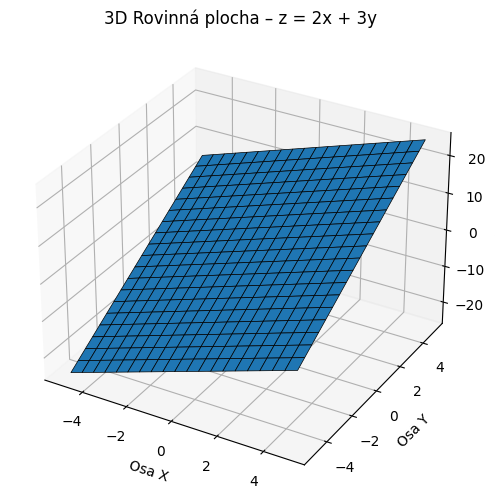

In [5]:
# Vykreslení
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vykresli plochu bez zakřivení
ax.plot_surface(X, Y, Z, edgecolor='black', linewidth=0.5)
# ax.view_init(elev=30, azim=60)  # Otočení

# Popisky os
ax.set_title("3D Rovinná plocha – z = 2x + 3y")
ax.set_xlabel("Osa X")
ax.set_ylabel("Osa Y")
ax.set_zlabel("Osa Z")

plt.show()

### Kombinace subplots a 3D
---

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [7]:
# Vytvoření sítě bodů
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

In [8]:
# Rovnice roviny: z = 2x + 3y
Z = 2 * X + 3 * Y

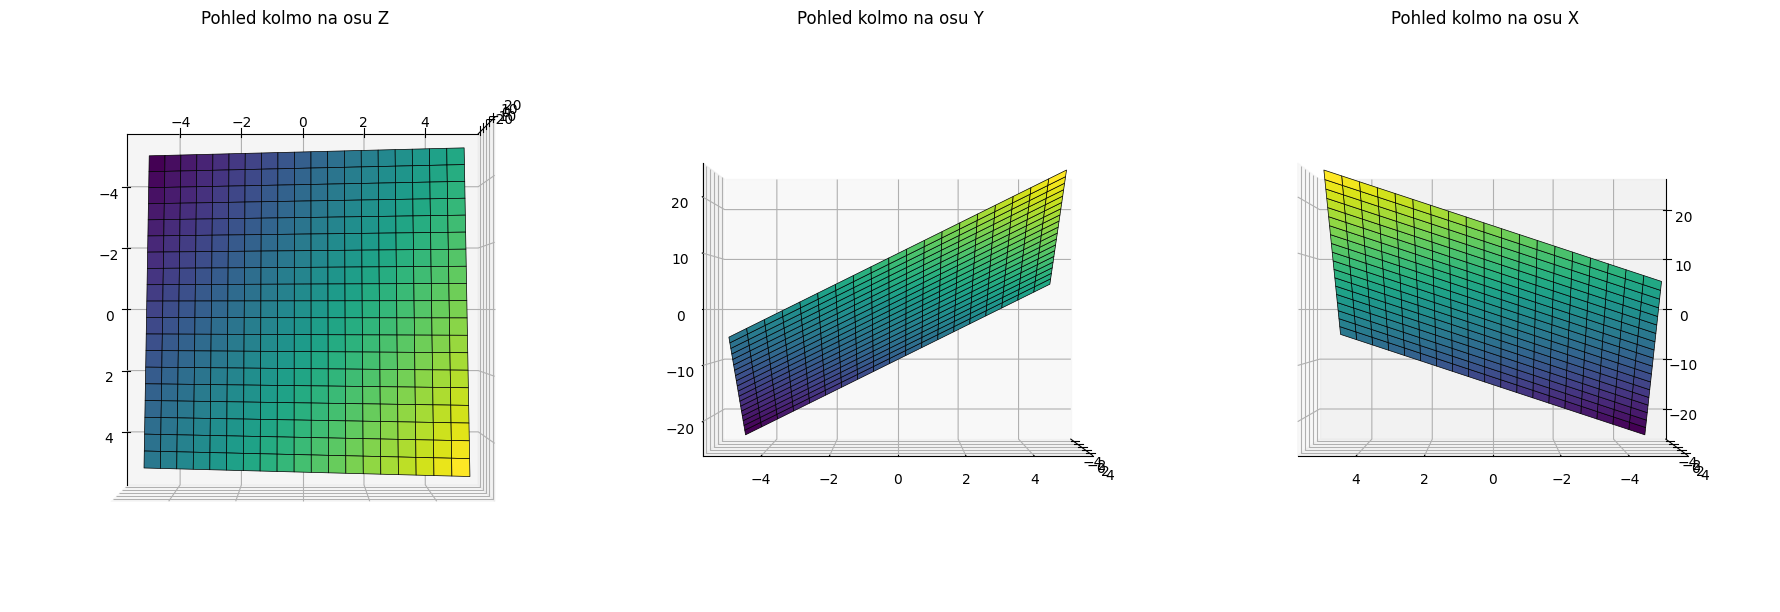

In [9]:
# Vytvoření 3 subplotů
fig = plt.figure(figsize=(18, 6))

# Pohled kolmý na osu Z (shora)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='black', linewidth=0.5)
ax1.set_title("Pohled kolmo na osu Z")
ax1.view_init(elev=90, azim=0)

# Pohled kolmý na osu Y (z boku)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='black', linewidth=0.5)
ax2.set_title("Pohled kolmo na osu Y")
ax2.view_init(elev=0, azim=0)

# Pohled kolmý na osu X (zepředu)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, Z, cmap='viridis', edgecolor='black', linewidth=0.5)
ax3.set_title("Pohled kolmo na osu X")
ax3.view_init(elev=0, azim=90)

plt.tight_layout()
plt.show()

---